In [346]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn import metrics

%matplotlib inline

In [347]:
university_admission_application = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [348]:
#Splitting using sklearn

X = university_admission_application[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]

y = university_admission_application['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [349]:
university_admission_application.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [350]:
#Remove redundant column
university_admission_application.drop('Serial No.',axis = 1,inplace = True)

university_admission_application.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


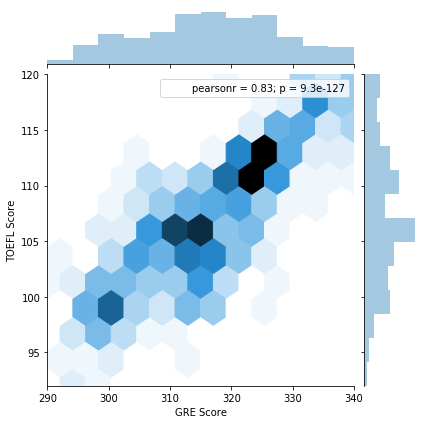

In [351]:
sns.jointplot(university_admission_application['GRE Score'],university_admission_application['TOEFL Score'],kind='hex')

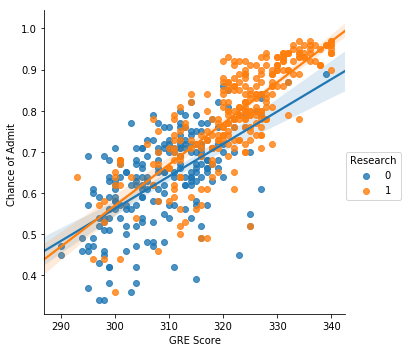

In [352]:
sns.lmplot(data = university_admission_application , x = 'GRE Score', y = 'Chance of Admit ', hue = 'Research')



 Higher GRE Score higher chances of admit

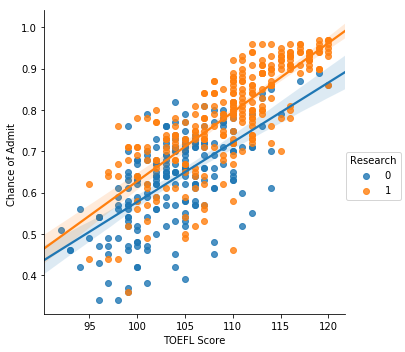

In [353]:
sns.lmplot(data = university_admission_application , x = 'TOEFL Score', y = 'Chance of Admit ', hue = 'Research')



 Higher TOEFL Score higher chances of admit

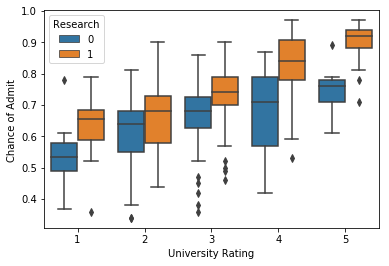

In [354]:

sns.boxplot(x = university_admission_application['University Rating'], y = university_admission_application['Chance of Admit '],hue = university_admission_application['Research'])


Research leads to higher chance of acceptance if university rating is the same

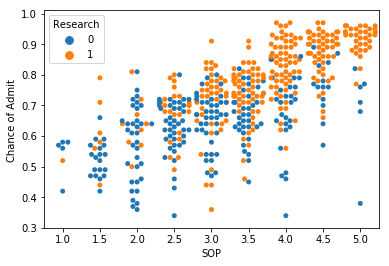

In [355]:
sns.swarmplot(data = university_admission_application , x = 'SOP' , y = 'Chance of Admit ', hue = 'Research')


Most of the people who have good sop have done research and hence have a lot to write about

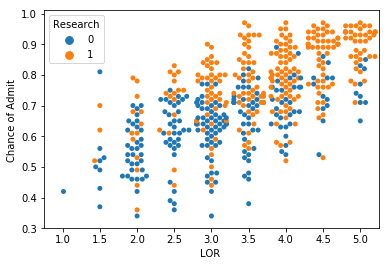

In [356]:
sns.swarmplot(data = university_admission_application , x = 'LOR ' , y = 'Chance of Admit ', hue = 'Research')



Most of the people who have done research will have professors to recommend them

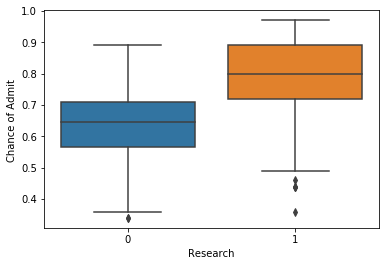

In [358]:

sns.boxplot(x = university_admission_application['Research'], y = university_admission_application['Chance of Admit '])



Research leads to higher chance of acceptance

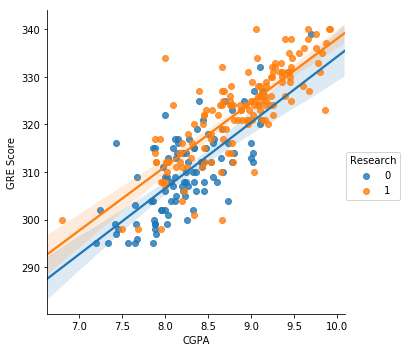

In [359]:
sns.lmplot(x = 'CGPA',y ='GRE Score',hue = 'Research',data=X_train)



Generally students with higher CGPA have higher GRE Scores and the ones with high CGPA have done more research

In [360]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
result_data_frame = pd.DataFrame(regressor.coef_,X_train.columns,columns = ['Theta'])

print(result_data_frame)

                      Theta
GRE Score          0.002620
TOEFL Score        0.001925
University Rating  0.002273
SOP                0.008406
LOR                0.013330
CGPA               0.123291
Research           0.011691


In [361]:
y_pred = regressor.predict(X_test)  


In [362]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  



Mean Absolute Error: 0.044515501307
Mean Squared Error: 0.00399747023582
Root Mean Squared Error: 0.0632255504984


With test size = 0.5
Mean Absolute Error: 0.044515501307
Mean Squared Error: 0.00399747023582
Root Mean Squared Error: 0.0632255504984

With test size = 0.2
Mean Absolute Error: 0.0427226542771
Mean Squared Error: 0.00370465539879
Root Mean Squared Error: 0.0608658804158

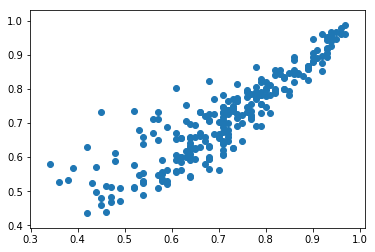

In [363]:
plt.scatter(y_test,y_pred)

Almost directly correlated so linear regression is a good fit

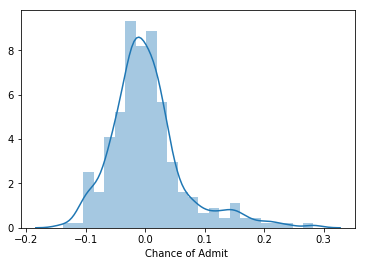

In [364]:
sns.distplot((y_pred-y_test))


If this is normally distributed then the model is a good fit for the data
The distribution of the difference between predicted and actual data is centered around 0 which means that the linear model is a good fit for the data

--------------------------------POLYNOMIAL FIT--------------------------------

In [365]:
from sklearn.preprocessing import PolynomialFeatures

Polynomial degree 4

In [366]:
linear_regression_with_polynomial_features = LinearRegression()

In [367]:


polynomial = PolynomialFeatures(degree = 4, include_bias=True)

polynomial_X = polynomial.fit_transform(X_train)
polynomial.fit(polynomial_X, y_train)



PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [368]:

linear_regression_with_polynomial_features.fit(polynomial_X, y_train)

y_pred_polynomial = linear_regression_with_polynomial_features.predict(polynomial.fit_transform(X_test))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_polynomial))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_polynomial))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_polynomial)))  


Mean Absolute Error: 1.10578140878
Mean Squared Error: 4.19420751566
Root Mean Squared Error: 2.04797644412


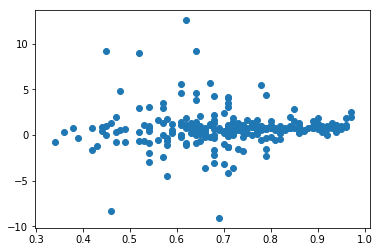

In [369]:
plt.scatter(y_test,y_pred_polynomial)


Here model is polynomial with degree 4 so it is be overfitting the data

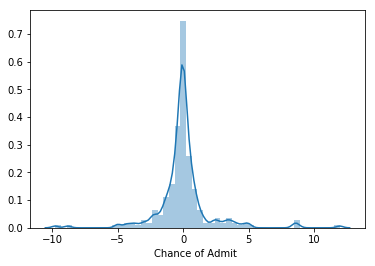

In [370]:
sns.distplot((y_pred_polynomial-y_test))


Polynomial degree 3

In [371]:
linear_regression_with_polynomial_features_degree_3 = LinearRegression()

In [372]:
polynomial_degree_3 = PolynomialFeatures(degree = 3, include_bias=True)

polynomial_X_3 = polynomial_degree_3.fit_transform(X_train)
polynomial_degree_3.fit(polynomial_X_3, y_train)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)

In [373]:

linear_regression_with_polynomial_features_degree_3.fit(polynomial_X_3, y_train)

y_pred_polynomial_3 = linear_regression_with_polynomial_features_degree_3.predict(polynomial_degree_3.fit_transform(X_test))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_polynomial_3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_polynomial_3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_polynomial_3)))  


Mean Absolute Error: 0.0731726377422
Mean Squared Error: 0.0127691031606
Root Mean Squared Error: 0.113000456462


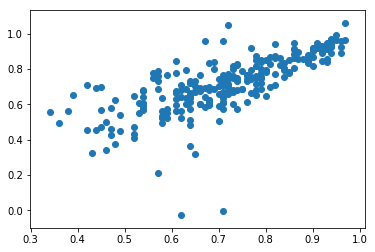

In [374]:
plt.scatter(y_test,y_pred_polynomial_3)


Here model is perfectly fitting the data as there is linear correlation in the data

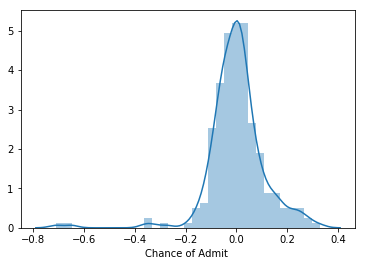

In [375]:
sns.distplot((y_pred_polynomial_3-y_test))
